In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X, Y = mnist['data'], mnist['target']
X.shape, Y.shape

((70000, 784), (70000,))

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [1]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

NameError: name 'plt' is not defined

In [15]:
Y[0]

'5'

In [16]:
Y = Y.astype(np.uint8)

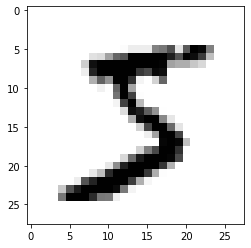

5


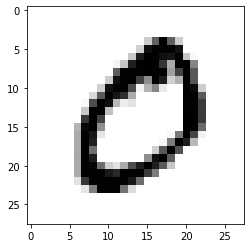

0


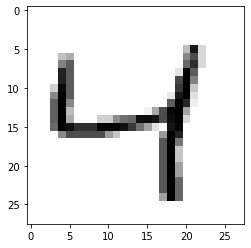

4


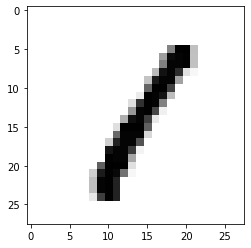

1


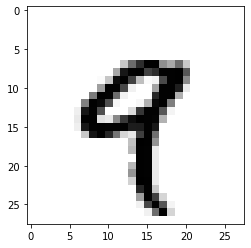

9


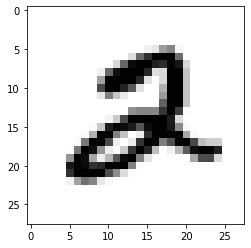

2


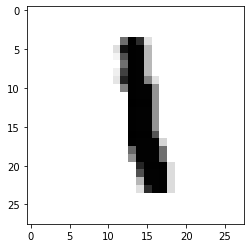

1


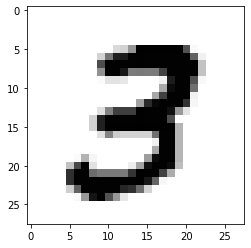

3


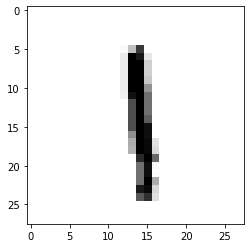

1


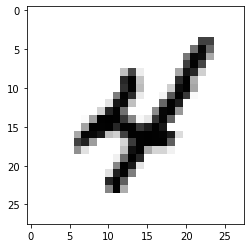

4


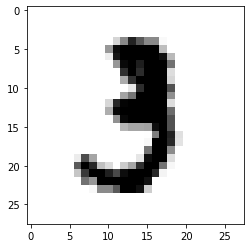

3


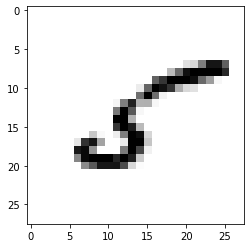

5


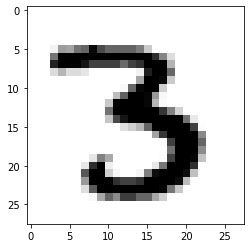

3


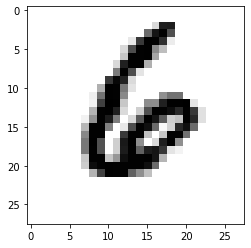

6


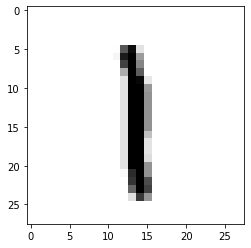

1


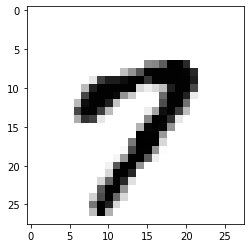

7


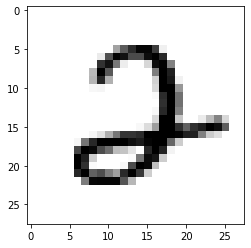

2


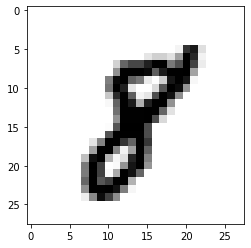

8


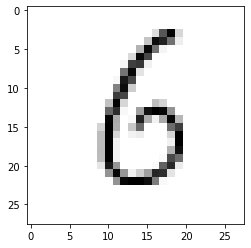

6


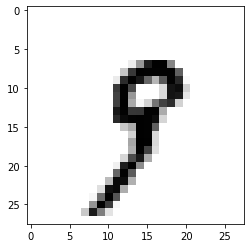

9


In [19]:
for i in range(20):
    some_digit = X[i].reshape(28,28)
    plt.imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
    plt.show()
    print(Y[i])

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

## We got data. Created training, testing data. Now we will train a binary classifier which detects if a number is 5.

In [21]:
y_train_5 = (y_train == 5)

In [22]:
y_test_5 = (y_test == 5)

## Stochastic Gradient Descent (SGD) classifier

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

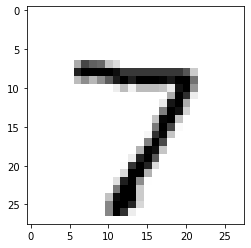

PREDICTED -  [False] ACTUAL -  False


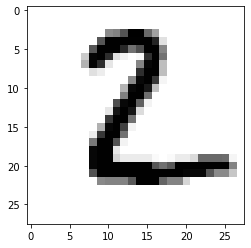

PREDICTED -  [False] ACTUAL -  False


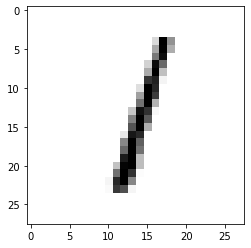

PREDICTED -  [False] ACTUAL -  False


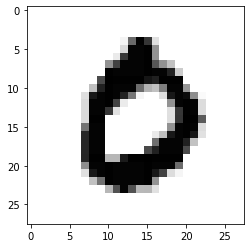

PREDICTED -  [False] ACTUAL -  False


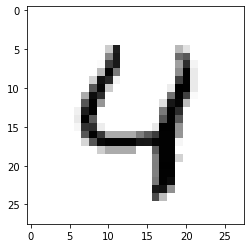

PREDICTED -  [False] ACTUAL -  False


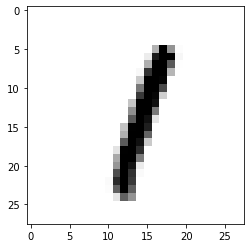

PREDICTED -  [False] ACTUAL -  False


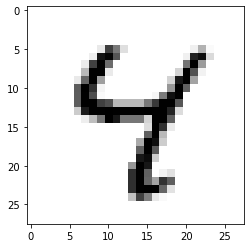

PREDICTED -  [False] ACTUAL -  False


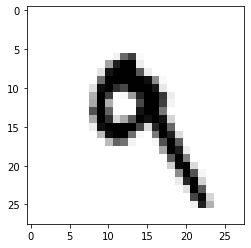

PREDICTED -  [False] ACTUAL -  False


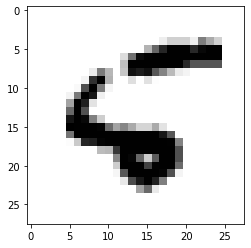

PREDICTED -  [False] ACTUAL -  True


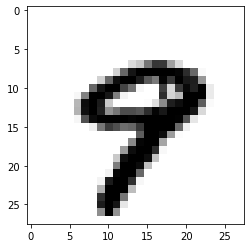

PREDICTED -  [False] ACTUAL -  False


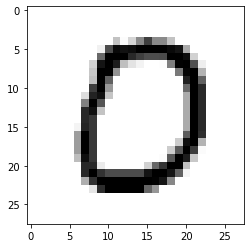

PREDICTED -  [False] ACTUAL -  False


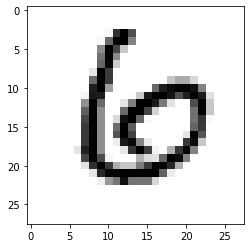

PREDICTED -  [False] ACTUAL -  False


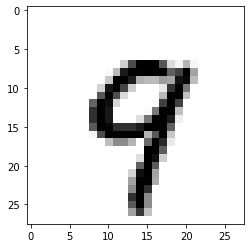

PREDICTED -  [False] ACTUAL -  False


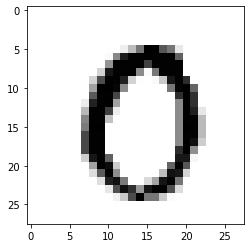

PREDICTED -  [False] ACTUAL -  False


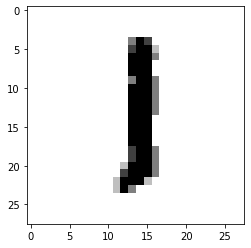

PREDICTED -  [False] ACTUAL -  False


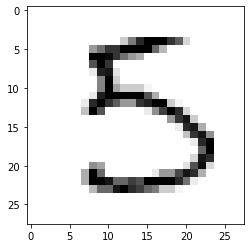

PREDICTED -  [ True] ACTUAL -  True


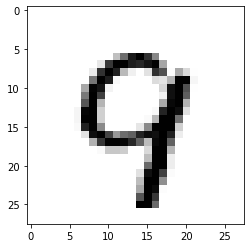

PREDICTED -  [False] ACTUAL -  False


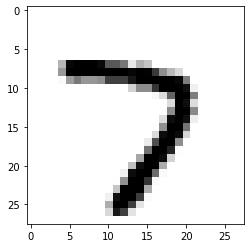

PREDICTED -  [False] ACTUAL -  False


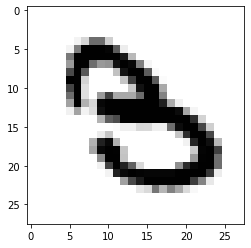

PREDICTED -  [False] ACTUAL -  False


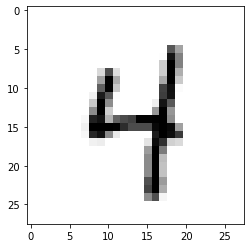

PREDICTED -  [False] ACTUAL -  False


In [27]:
for i in range(20):
    some_digit = X_test[i].reshape(28,28)
    plt.imshow(some_digit, cmap=mpl.cm.binary, interpolation='nearest')
    plt.show()
    print('PREDICTED - ', sgd_clf.predict([X_test[i]]), 'ACTUAL - ', y_test_5[i])

## We trained our classifier. Time to test it !
### Using cross_validation

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

## THIS CAN BE DONE DIRECTLY USING cross_val_score of scikit learn.


c:\users\91763\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds 

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Accuracy of more than 95%. Pretty nice, right?
#### If we had used a model that just returns false will have around 90% accuracy.
So, accuracy is not correct measure of our model in this case.

## Confusion matrix

The general idea is to count the number of times instances of class A are classified as class B.
For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### We measure how good our model is, by Precision and Recall

![title](confusion.jpg)

Precision is accuracy of the positive predictions.

### Precision$=\frac{TP}{TP+FP}$

Recall is ratio of positive instances that are correctly detected by the classifier.

### Recall$=\frac{TP}{TP+FN}$

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_5, y_train_pred) #3530/(3530+687)

0.8370879772350012

In [37]:
 recall_score(y_train_5, y_train_pred) #3530/(3530+1891)

0.6511713705958311

When our models claims an image represents a 5, it is correct only 83% of the time.

It only detects 65% of the 5s

In [38]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

###### f1_score is HM of precision and recall. Normally, we use this to compare 2 models
(If you are trainign a classifier to remove videos for kids. You'll want high precision and less recall. And, if a model has to detect shoplifters. You'd want 99% recall and will be fine with 30% precision)

## Precision-Recall tradeoff

If we'll want to increase precision, we'll have to compromise with recall and vice-versa.
Example... If we set threshold to different positions there are different recalls and precisions.

![image](tradeoff.jpg)

We cannot change threshold directly using scikit-learn. But we can get the score and then decide based on our own thresold.(Default thresold is 0)

In [42]:
y_scores = sgd_clf.decision_function([X_test[100], X_test[101], X_test[102]])
y_scores

array([-17674.01690827,  -3689.98134702,   2588.23260446])

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [44]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

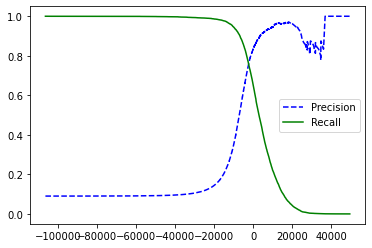

In [45]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()

With increase in threshold, Precision may go down (Mostly it goes up) but recall always goes down. (Logic is simple math)

Text(0, 0.5, 'Recall')

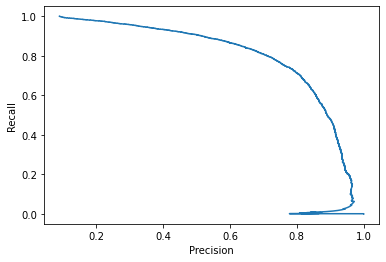

In [56]:
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')

## ROC Curve

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

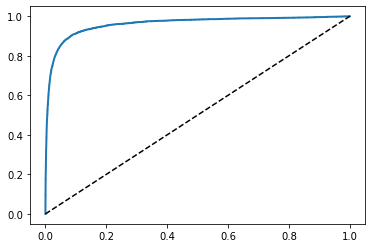

In [61]:
plt.plot(fpr, tpr, linewidth=2, label='ROC')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

One way to compare classifiers is to measure the area under the curve (AUC).

A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [62]:
 from sklearn.metrics import roc_auc_score

In [63]:
 roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [66]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s probability as the score

In [76]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

ValueError: ndarray should be a binary classifier

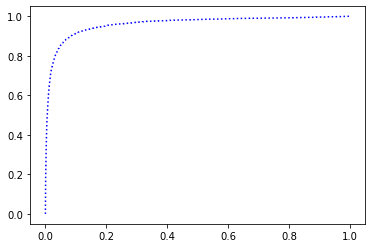

In [77]:
from sklearn.metrics import plot_roc_curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [74]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# TASK - Calculate precision and recall